In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Cargamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.chdir('..')

In [4]:
# Cargamos las dos tablas de datos
perfiles = pd.read_parquet('data/raw/flex_perfiles_usuario.parquet')
sesiones = pd.read_parquet('data/raw/flex_sesiones.parquet')

In [5]:
sesiones_validas = sesiones.idPerfil.isin(set(perfiles.idPerfiles))

In [7]:
sesiones_validas

0        False
1        False
2        False
3        False
4        False
         ...  
73545     True
73546     True
73547     True
73548     True
73549     True
Name: idPerfil, Length: 73550, dtype: bool

In [14]:
ultima_sesion = sesiones[sesiones_validas].sort_values(['idPerfil','fechaInicio'],ascending=False).groupby('idPerfil').first()

In [22]:
ultima_sesion = ultima_sesion[['fechaInicio', 'idImatt', 'lecho','sqr']]

In [21]:
perfiles_info = perfiles.set_index('idPerfiles')[['altura', 'peso', 'sexo', 'posicion', 'presiones']]

In [30]:
perfiles_sqr = perfiles_info.join(ultima_sesion, how='inner')

In [37]:
for col in ['altura', 'peso']:
    perfiles_sqr[col] = perfiles_sqr[col].str.replace(',','.').astype('float')

In [57]:
perfiles_sqr.describe(percentiles=([i*0.05 for i in range(20)]))

,altura,peso,idImatt,lecho,sqr
count,1551.000000,1551.000000,1551.000000,1551.000000,1544.000000
mean,161.574900,72.647389,591.691167,1.426821,1949.887249
std,44.955742,23.924077,250.459731,0.494775,7715.809630
min,0.000000,0.000000,10.000000,1.000000,-0.018808
0%,0.000000,0.000000,10.000000,1.000000,-0.018808
5%,1.585000,22.000000,132.000000,1.000000,3.085290
10%,156.000000,52.000000,218.000000,1.000000,15.385730
15%,160.000000,55.000000,282.000000,1.000000,19.660880
20%,160.000000,58.000000,348.000000,1.000000,22.870360
25%,162.500000,60.000000,415.000000,1.000000,26.555850


In [84]:
presiones_sqr_filtrado = perfiles_sqr[(perfiles_sqr["peso"]<150) 
                                      & (perfiles_sqr["peso"]!=0 )
                                      & (perfiles_sqr["altura"]>100) 
                                      & (perfiles_sqr["altura"]<220) 
                                      & (perfiles_sqr['sexo'] != 'Manual')
                                      & (perfiles_sqr['sqr'] > 3.085)
                                      & (perfiles_sqr['sqr'] < 15000)].drop(columns = ['presiones', 'idImatt'])

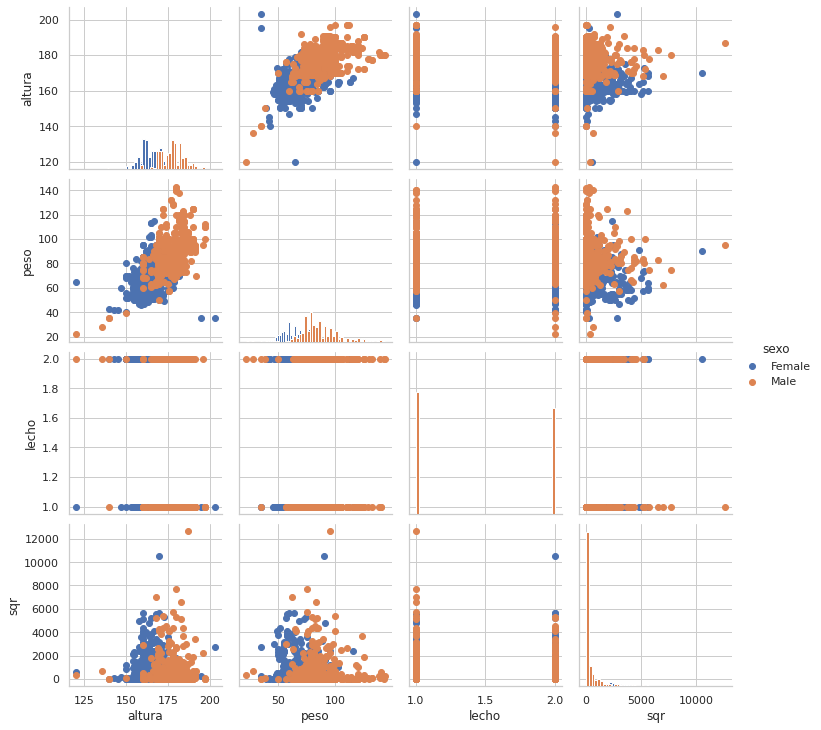

In [85]:
g = sns.PairGrid(presiones_sqr_filtrado, hue="sexo")
g.map_diag(plt.hist, bins = 50)
g.map_offdiag(plt.scatter)
g.add_legend();

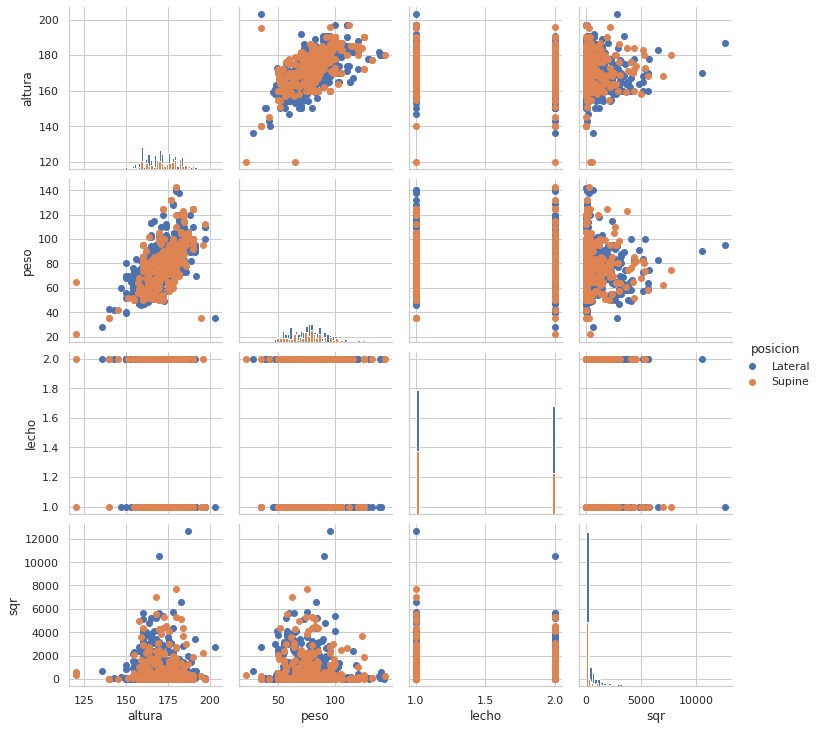

In [86]:
g = sns.PairGrid(presiones_sqr_filtrado, hue="posicion")
g.map_diag(plt.hist, bins=50)
g.map_offdiag(plt.scatter)
g.add_legend();

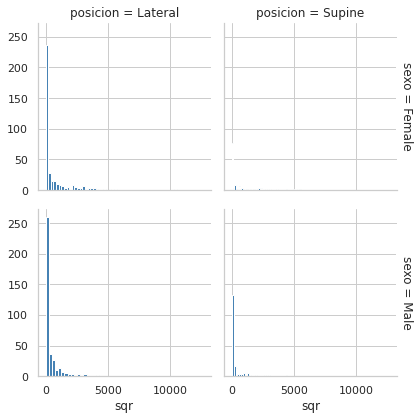

In [88]:
g = sns.FacetGrid(presiones_sqr_filtrado, row="sexo", col="posicion", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "sqr", color="steelblue", bins=50);

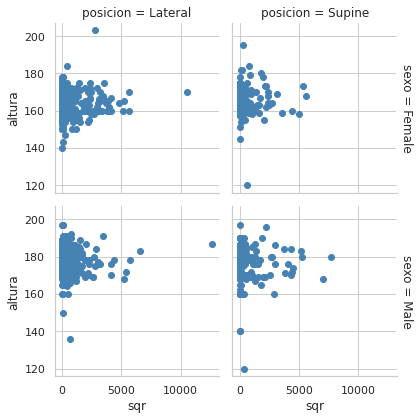

In [91]:
g = sns.FacetGrid(presiones_sqr_filtrado, row="sexo", col="posicion", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.scatter, "sqr", "altura", color="steelblue");

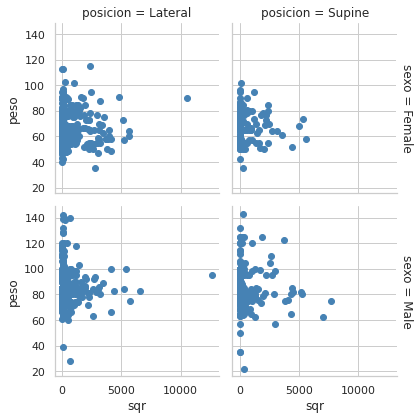

In [93]:
g = sns.FacetGrid(presiones_sqr_filtrado, row="sexo", col="posicion", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.scatter, "sqr", "peso", color="steelblue");